In [1]:
import jieba
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import (WordCloud, get_single_color_func,STOPWORDS)
import re

In [2]:
class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.
       Uses wordcloud.get_single_color_func
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)
    


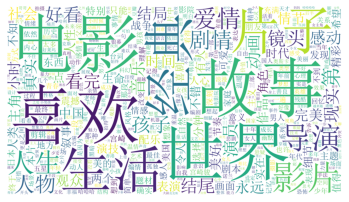

In [50]:
def content_preprocess(csv):
#     preprocess: extract comment content
    df = pd.read_csv(csv)
    preprocessed_data = df[['评论']]
#     Index and columns are not saved
    preprocessed_data.to_csv('content4wordcloud.csv',header = 0,index = 0)

content_preprocess('douban_comment.csv')
# content_preprocess('douban_comment.csv')

def word_cloud_creation(filename):
    '''create word cloud and split the words'''
    text = open(filename, encoding = 'utf-8', errors = 'ignore').read()
    word_list = jieba.cut(text, cut_all = True)
    wl = ' '.join(word_list)
    return wl

stoptext1 = open('stopword.txt',encoding='utf-8').read()
stopwords = stoptext1.split('\n')
stoptext2 = open('stopword2.txt',encoding='utf-8').read()
stopwords = stopwords+stoptext2.split('\n')
stopwords = stopwords+['一部','这部','看过','真的','感觉','一种']


def word_cloud_setting():
    wc = WordCloud(max_words=500, collocations = False,repeat = True,background_color='white',scale=1.5, stopwords=stopwords,height = 1080, width = 1920, font_path = 'C:\Windows\Fonts\simsun.ttc')
    return wc

def word_cloud_implementation(wl,wc):
    '''Generate word cloud and display'''
    my_words = wc.generate(wl)
    plt.imshow(my_words)
    plt.axis('off')
    wc.to_file('word_cloud.png')
    plt.show()


wl = word_cloud_creation('content4wordcloud.csv')
wc = word_cloud_setting()


word_cloud_implementation(wl,wc)


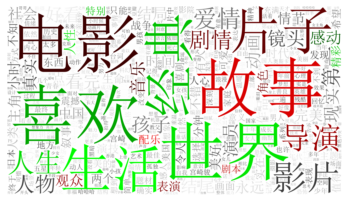

In [51]:
# This Part: Emphasize what's most focused and professional
color_to_words = {
    # words below will be colored with a single color function
# focus on the film itself
    'red': ['电影', '导演', '故事', '剧情', '配乐', '剧本', '表演','角色','镜头', '音乐','主角','观众','片子'],
# talk about something else or feeling/attitude
    'green': ['真的', '感觉','精彩','感动','喜欢','特别','人生', '世界', '生活','人性','经典']
}

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)
wc.to_file('word_cloud_emphasized.png')
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
df = pd.read_csv('imdb_movie_review_info.csv')
preprocessed_data = df[['userReview']]
preprocessed_data

pandas.core.frame.DataFrame

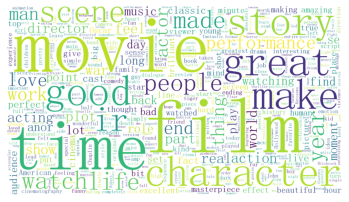

In [52]:

def content_preprocess(csv):
#     preprocess: extract comment content
    df = pd.read_csv(csv)
    preprocessed_data = df[['userReview']]
#     Index and columns are not saved
    preprocessed_data.to_csv('content4wordcloud.csv',header = 0,index = 0)

content_preprocess('imdb_movie_review_info.csv')
# content_preprocess('douban_comment.csv')

def word_cloud_creation(filename):
    '''create word cloud and split the words'''
    text = open(filename, encoding = 'utf-8', errors = 'ignore').read()
#     word_list = jieba.cut(text, cut_all = True)
    wl = ''.join(text)
    wl = re.sub('<.*?>','',wl)
    wl = re.sub('the','',wl)
#     wl = re.sub('this')
    return wl

stoptext1 = open('stopword.txt',encoding='utf-8').read()
stopwords = stoptext1.split('\n')
stoptext2 = open('stopword2.txt',encoding='utf-8').read()
stopwords = stopwords+stoptext2.split('\n')
stopwords = stopwords+['wa','a','i','time','make','watch']


def word_cloud_setting():
#     stopwords = ['当然','所以','另外','不过','so','that','what','me','to','so','of','it','and','the','in','you','but','will','with','但是','最后','还有']
    wc = WordCloud(max_words=500, collocations = False,repeat = True,background_color='white',scale=1.5, stopwords=stopwords,height = 1080, width = 1920, font_path = 'C:\Windows\Fonts\simsun.ttc')
    return wc

def word_cloud_implementation(wl,wc):
    '''Generate word cloud and display'''
    my_words = wc.generate(wl)
    plt.imshow(my_words)
    plt.axis('off')
    wc.to_file('word_cloud_imdb.png')
    plt.show()


wl = word_cloud_creation('content4wordcloud.csv')
wc = word_cloud_setting()


word_cloud_implementation(wl,wc)


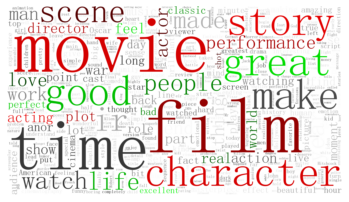

In [57]:
# This Part: Emphasize what's most focused and professional
color_to_words = {
    # words below will be colored with a single color function
    'red': ['movie', 'film', 'character', 'performance', 'story',  'shot','actor','scene', 'director','plot','acting'],
# talk about something else or feeling/attitude
    'green': ['life', 'people','good','like','bad','love', 'great', 'feel','world','excellent','perfect','real','classic']
}

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)
wc.to_file('word_cloud_emphasized_imdb.png')
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In this part, we will find out what people tend to talk about in the movie reviews on douban and imdb separately. We're doing this by WordCloud which is a fascinating approach for us to figure out what's frequently occurs in people's reviews. By WordCloud, the most frequent words would be larger than other words. We can instantly see what we should pay attention to. Here is the two wordclouds figures of the reviews of each top250 movies on imdb and douban. We chose the top100 rated reviews which are basically positive. They can tell us what on earth people love about the movies. 

Of course, stopwords list must be added to filter out some meaningless words for example, 'the', 'than', 'that'. 

I noticed that people on douban may be customed to make a comment that is more based on self-feelings and experience, while people on imdb tend to talk about the movie itself. To see this feature more clearly, I have marked the words concerned about the movies **red** and the words about self experience and emotional feelings **green**. Basically, red words are more objective and green words are more subjective.

So I chose these words:

Indeed, if you take a closer look, you will find that many comments on douban are more likely to talk about world, life, and whether they like the movie, which makes the clouds greener. However, imdb users tend to talk about performance, character, scenes.(red) I can't help wondering if this suggest that Chinese people and English-speaking world have a difference in thinking pattern or way of describing a thing. We Chinese like to focus on ourselves' life and feeling while the English-speaking community may prefer start from something about the movies. 

Well, this could also be the result of the difference in grammar. But I figure that this might not be the main reason.

Moreover, Chinese seldom use simple words like '赞,棒great' to directly express their feelings('好good' is in the stopwords, 'like' as well), though they start with something that's not closely related to the movies.(world, life) We prefer to say a movie is '感人touching', or '真实close to reality' if we think they are very good. On the other hand, imdb users describe a movie with 'excellent', 'perfect'. They use these words as the highest praise.

For further research on reviews, my teammate Haoyun has done some research on prediction about genres by reviews.



douban:

    'red': '电影', '导演', '故事', '剧情', '配乐', '剧本', '表演','角色','镜头', '音乐','主角','观众','片子'
     
     meaning: movie, director, story, plot, soundtrack, script, performance, character, shot, music, main character, audience, film(another)
        
    'green': '真的', '感觉','精彩','感动','喜欢','特别','人生', '世界', '生活','人性','经典','现实'
    
    meaning: really, feel, excellent, touching, like, special(particularly), life, world, living(daily), humanity, classic, reality
    
imdb:
    
    'red': 'movie', 'film', 'character', 'performance', 'story',  'shot','actor','scene', 'director','plot','acting'
    
    'green': 'life', 'people','good','like','bad','love', 'great', 'feel','world','excellent','perfect','real'